# Graph Dataset

Берем отсюда: [link](https://www.bnlearn.com/bnrepository/)

Используем библиотеку [pgmpy](https://github.com/pgmpy/pgmpy)

О том, как задавать распределения в вершинах с помощью pgmpy: [link](https://colab.research.google.com/github/ankurankan/pgmpy/blob/dev/examples/Creating%20a%20Discrete%20Bayesian%20Network.ipynb#scrollTo=_0zV-hbn1QQQ)

#### ASIA [link](https://www.bnlearn.com/bnrepository/discrete-small.html#asia)

In [ ]:
!pip install pgmpy
!sudo apt-get install graphviz graphviz-dev
!pip install pygraphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.1 MB/s eta 0:00:00


In [ ]:
path_to_save = '/content/drive/MyDrive/BMM_2024_GMG/'

In [ ]:
# Imports
from IPython.display import Image
from pgmpy.utils import get_example_model
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import pandas as pd
from pgmpy.base import DAG

In [ ]:
graphs_with_description = pd.DataFrame(columns=['nodes', 'edges', 'descr', 'node_distrs', 'paper_link', 'position_in_paper'])

In [ ]:
from copy import copy

def get_node_distr(node_values):
    try:
        n = len(node_values)
        if n == 1:
            return "Deterministic"
        if n == 2:
            return "Binary"
        return "Multinomial"
    except:
        return "Continious"


def add_pgmpy_graph_to_table(g, descr, paper_link=None, position_in_paper=None):
    '''
        each node_distr are from [Deterministic, Binary, Multinomial, Continious]
    '''
    nodes = list(g.nodes())
    edges = list(g.edges())

    global graphs_with_description

    node_distr = copy(g.states)


    for node_name, all_values in g.states.items(): # all values like ['var_A', ...]
        node_distr[node_name] = get_node_distr(all_values)

    # for cpd in g.get_cpds():
    #     cpd_str = cpd.to_factor()
    #     vertex_name = cpd_str.variable
    #     vertex_to_links = cpd_str.variables[1:]

    graphs_with_description.loc[len(graphs_with_description)] = {
        'nodes': nodes,
        'edges': edges,
        'descr': descr,
        'node_distrs': node_distr,
        'paper_link': paper_link,
        'position_in_paper': position_in_paper,
    }

    return graphs_with_description

#### 1. Small Networks (<20 nodes)

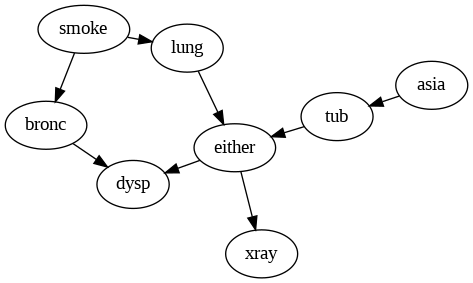

In [ ]:
# Load the model
asia_model = get_example_model('asia')

# Visualize the network
viz = asia_model.to_graphviz()
viz.draw('asia.png', prog='neato')
Image('asia.png')

In [ ]:
asia_brief_description = "Shortness-of-breath (dyspnoea) may be due to tuberculosis, lung cancer or bronchitis, or none of them, or more than one of them. A recent visit to Asia increases the chances of tuberculosis, while smoking is known to be a risk factor for both lung cancer and bronchitis. The results of a single chest X-ray do not discriminate between lung cancer and tuberculosis, as neither does the presence or absence of dyspnoea."
asia_additional_description = "This needs to be applied to the following hypothetical situation. A patient presents at a chest clinic with dyspnoea, and has recently visited Asia. Smoking history and chest X-ray are not yet available. The doctor would like to know the chance that each of the diseases is present, and if tuberculosis were ruled out by another test, how would that change the belief in lung cancer? Also, would knowing smoking history or getting an X-ray contribute most information about cancer, given that smoking may 'explain away' the dyspnoea since bronchitis is considered a possibility? Finally, when all information is in, can we identify which was the most influential in forming our judgement?"

add_pgmpy_graph_to_table(asia_model,
                         descr=asia_brief_description,
                         paper_link='https://www.eecis.udel.edu/~shatkay/Course/papers/Lauritzen1988.pdf',
                         position_in_paper='page 9')

,nodes,edges,descr,node_distrs,paper_link,position_in_paper
0,"[asia, tub, smoke, lung, bronc, either, xray, ...","[(asia, tub), (tub, either), (smoke, lung), (s...",Shortness-of-breath (dyspnoea) may be due to t...,"{'asia': 'Binary', 'smoke': 'Binary', 'bronc':...",https://www.eecis.udel.edu/~shatkay/Course/pap...,page 9


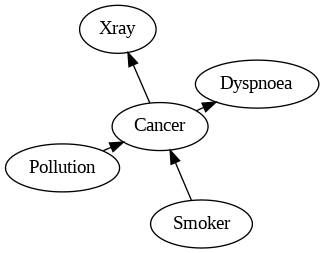

In [ ]:
# Load the model
cancer_model = get_example_model('cancer')

# Visualize the network
viz = cancer_model.to_graphviz()
viz.draw('cancer.png', prog='neato')
Image('cancer.png')

In [ ]:
cancer_brief_description = "So, in our medical diagnosis example, we might ask what factors affect a patient’s chance of having cancer? If the answer is “Pollution and smoking,” then we should add arcs from Pollution and Smoker to Cancer. Similarly, having cancer will affect the patient’s breathing and the chances of having a positive X-ray result. So we add arcs from Cancer to Dyspnoea and XRay."

cancer_additional_description = ". In our example, the Cancer node has two parents, Pollution and Smoker, while Smoker is an ancestor of both X-ray and Dyspnoea. Similarly, Xray is a child of Cancer and descendant of Smoker and Pollution"
add_pgmpy_graph_to_table(cancer_model,
                         descr=cancer_brief_description,
                         paper_link='http://repo.darmajaya.ac.id/5277/1/Bayesian%20Artificial%20Intelligence%2C%20Second%20Edition%20%28%20PDFDrive%20%29.pdf',
                         position_in_paper='page 28, section 2.2.2')

,nodes,edges,descr,node_distrs,paper_link,position_in_paper
0,"[asia, tub, smoke, lung, bronc, either, xray, ...","[(asia, tub), (tub, either), (smoke, lung), (s...",Shortness-of-breath (dyspnoea) may be due to t...,"{'asia': 'Binary', 'smoke': 'Binary', 'bronc':...",https://www.eecis.udel.edu/~shatkay/Course/pap...,page 9
1,"[Pollution, Smoker, Cancer, Xray, Dyspnoea]","[(Pollution, Cancer), (Smoker, Cancer), (Cance...","So, in our medical diagnosis example, we might...","{'Pollution': 'Binary', 'Smoker': 'Binary', 'C...",http://repo.darmajaya.ac.id/5277/1/Bayesian%20...,"page 28, section 2.2.2"


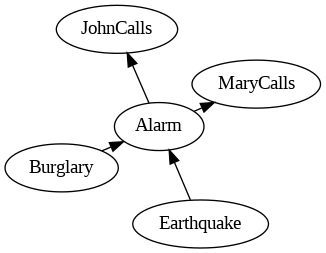

In [ ]:
# Load the model
earthquake_model = get_example_model('earthquake')

# Visualize the network
viz = earthquake_model.to_graphviz()
viz.draw('earthquake.png', prog='neato')
Image('earthquake.png')

In [ ]:
earthquake_brief_description = "You have a new burglar alarm installed. It reliably detects burglary, but also responds to minor earthquakes. Two neighbors, John and Mary, promise to call the police when they hear the alarm. John always calls when he hears the alarm, but sometimes confuses the alarm with the phone ringing and calls then also. On the other hand, Mary likes loud music and sometimes doesn’t hear the alarm."
earthquake_additional_description = "Given evidence about who has and hasn’t called, you’d like to estimate the probability of a burglary."

add_pgmpy_graph_to_table(earthquake_model,
                         descr=earthquake_brief_description,
                         paper_link='http://repo.darmajaya.ac.id/5277/1/Bayesian%20Artificial%20Intelligence%2C%20Second%20Edition%20%28%20PDFDrive%20%29.pdf',
                         position_in_paper='page 70, section 2.5.1')

,nodes,edges,descr,node_distrs,paper_link,position_in_paper
0,"[asia, tub, smoke, lung, bronc, either, xray, ...","[(asia, tub), (tub, either), (smoke, lung), (s...",Shortness-of-breath (dyspnoea) may be due to t...,"{'asia': 'Binary', 'smoke': 'Binary', 'bronc':...",https://www.eecis.udel.edu/~shatkay/Course/pap...,page 9
1,"[Pollution, Smoker, Cancer, Xray, Dyspnoea]","[(Pollution, Cancer), (Smoker, Cancer), (Cance...","So, in our medical diagnosis example, we might...","{'Pollution': 'Binary', 'Smoker': 'Binary', 'C...",http://repo.darmajaya.ac.id/5277/1/Bayesian%20...,"page 28, section 2.2.2"
2,"[Burglary, Earthquake, Alarm, JohnCalls, MaryC...","[(Burglary, Alarm), (Earthquake, Alarm), (Alar...",You have a new burglar alarm installed. It rel...,"{'Burglary': 'Binary', 'Earthquake': 'Binary',...",http://repo.darmajaya.ac.id/5277/1/Bayesian%20...,"page 70, section 2.5.1"


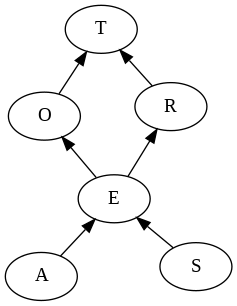

In [ ]:
# Load the model
survey_model = get_example_model('survey')

# Visualize the network
viz = survey_model.to_graphviz()
viz.draw('survey.png', prog='neato')
Image('survey.png')

In [ ]:
survey_brief_description = '''
In our current example we will examine, for each individual, the following six discrete variables (labels used in computations and figures are reported in parenthesis):
• Age (A): the age, recorded as young (young) for individuals below 30 years old, adult (adult) for individuals between 30 and 60 years old, and old (old) for people older than 60.
• Sex (S): the biological sex, recorded as male (M) or female (F).
• Education (E): the highest level of education or training successfully completed, recorded as up to high school (high) or university degree (uni).
• Occupation (O): whether the individual is an employee (emp) or a selfemployed (self) worker.
• Residence (R): the size of the city the individual lives in, recorded as either small (small) or big (big).
• Travel (T): the means of transport favoured by the individual, recorded either as car (car), train (train) or other (other).
'''
survey_additional_description = "In the scope of this survey, each variable falls into one of three groups. Age and Sex are demographic indicators. In other words, they are intrinsic characteristics of the individual; they may result in different patterns of behaviour but are not influenced by the individual himself. On the other hand, the opposite is true for Education, Occupation and Residence. These variables are socioeconomic indicators and describe the individual’s position in society. Therefore, they provide a rough description of the individual’s expected lifestyle; for example, they may characterise his spending habits and his work schedule. The last variable, Travel, is the target of the survey, the quantity of interest whose behaviour is under investigation."


add_pgmpy_graph_to_table(survey_model,
                         descr=survey_brief_description,
                         paper_link='https://www.taylorfrancis.com/books/mono/10.1201/9780429347436/bayesian-networks-marco-scutari-jean-baptiste-denis',
                         position_in_paper='page 17, section 1.1')

,nodes,edges,descr,node_distrs,paper_link,position_in_paper
0,"[asia, tub, smoke, lung, bronc, either, xray, ...","[(asia, tub), (tub, either), (smoke, lung), (s...",Shortness-of-breath (dyspnoea) may be due to t...,"{'asia': 'Binary', 'smoke': 'Binary', 'bronc':...",https://www.eecis.udel.edu/~shatkay/Course/pap...,page 9
1,"[Pollution, Smoker, Cancer, Xray, Dyspnoea]","[(Pollution, Cancer), (Smoker, Cancer), (Cance...","So, in our medical diagnosis example, we might...","{'Pollution': 'Binary', 'Smoker': 'Binary', 'C...",http://repo.darmajaya.ac.id/5277/1/Bayesian%20...,"page 28, section 2.2.2"
2,"[Burglary, Earthquake, Alarm, JohnCalls, MaryC...","[(Burglary, Alarm), (Earthquake, Alarm), (Alar...",You have a new burglar alarm installed. It rel...,"{'Burglary': 'Binary', 'Earthquake': 'Binary',...",http://repo.darmajaya.ac.id/5277/1/Bayesian%20...,"page 70, section 2.5.1"
3,"[A, S, E, O, R, T]","[(A, E), (S, E), (E, O), (E, R), (O, T), (R, T)]","\nIn our current example we will examine, for ...","{'A': 'Multinomial', 'S': 'Binary', 'E': 'Bina...",https://www.taylorfrancis.com/books/mono/10.12...,"page 17, section 1.1"


In [ ]:
graphs_with_description.to_csv(path_to_save + '/Training_graphs.csv')